In [1]:
import re
import time
import requests
import pandas as pd
from bs4 import BeautifulSoup

import matplotlib.pyplot as plt
from pygooglechart import PieChart3D

In [2]:
# Base URL for fetching data
base_url = "https://wits.worldbank.org/CountryProfile/en/Country/USA/Year/{}/TradeFlow/EXPIMP/Partner/CHN/Product/all-groups"

# Initialize an empty DataFrame
product_df = pd.DataFrame()

In [3]:
# Loop through the years from 1991 to 2022
for year in range(1991, 2023):
    
    # Print Progress
    print(f"Scraping Import/Export Data for {year}...")
    
    # Get the response for the specific year
    url = base_url.format(year)
    response = requests.get(url)
    soup = BeautifulSoup(response.text, "html.parser")

    # Extract the script tag containing the table data
    script_tags = soup.find_all('script', text=re.compile(r'var col\d+ ='))

    # Parse the JavaScript variables
    data = {}
    columns = []
    if script_tags:
        script_content = script_tags[0].string  # Get the script content
        for col_match in re.finditer(r"var (col\d+) =\s+\[([^\]]+)\];", script_content):
            col_name = col_match.group(1)  # Column name (e.g., col0, col1)
            col_data = eval(col_match.group(2))  # Convert the array string to a Python list
            data[col_name] = col_data
            columns.append(col_name)

        # Extract column headers from another script variable, if available
        headers_match = re.search(r"columns: \[\{ text:'([^']+)", script_content)
        headers = []
        if headers_match:
            headers = [header.group(1) for header in re.finditer(r"text:'([^']+)", script_content)]

        # If headers are empty, assign default headers
        if not headers:
            headers = [f"Column {i}" for i in range(len(columns))]

        # Create DataFrame for the current year
        year_df = pd.DataFrame(data).rename(columns={f"col{i}": headers[i] for i in range(len(headers))})
        
        # Add a Year column
        year_df["Year"] = year

        # Append to the combined DataFrame
        product_df = pd.concat([product_df, year_df], ignore_index=True)
        
    # Limit Requests to ~20 per second
    time.sleep(0.05)

# Reset index and show the combined DataFrame
product_df.reset_index(drop=True, inplace=True)
product_df

Scraping Import/Export Data for 1991...


/var/folders/47/m5xrl4k112q07z_rnn0q6wz00000gn/T/ipykernel_13553/666926702.py:13: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  script_tags = soup.find_all('script', text=re.compile(r'var col\d+ ='))


Scraping Import/Export Data for 1992...


/var/folders/47/m5xrl4k112q07z_rnn0q6wz00000gn/T/ipykernel_13553/666926702.py:13: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  script_tags = soup.find_all('script', text=re.compile(r'var col\d+ ='))


Scraping Import/Export Data for 1993...


/var/folders/47/m5xrl4k112q07z_rnn0q6wz00000gn/T/ipykernel_13553/666926702.py:13: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  script_tags = soup.find_all('script', text=re.compile(r'var col\d+ ='))


Scraping Import/Export Data for 1994...


/var/folders/47/m5xrl4k112q07z_rnn0q6wz00000gn/T/ipykernel_13553/666926702.py:13: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  script_tags = soup.find_all('script', text=re.compile(r'var col\d+ ='))


Scraping Import/Export Data for 1995...


/var/folders/47/m5xrl4k112q07z_rnn0q6wz00000gn/T/ipykernel_13553/666926702.py:13: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  script_tags = soup.find_all('script', text=re.compile(r'var col\d+ ='))


Scraping Import/Export Data for 1996...


/var/folders/47/m5xrl4k112q07z_rnn0q6wz00000gn/T/ipykernel_13553/666926702.py:13: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  script_tags = soup.find_all('script', text=re.compile(r'var col\d+ ='))


Scraping Import/Export Data for 1997...


/var/folders/47/m5xrl4k112q07z_rnn0q6wz00000gn/T/ipykernel_13553/666926702.py:13: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  script_tags = soup.find_all('script', text=re.compile(r'var col\d+ ='))


Scraping Import/Export Data for 1998...


/var/folders/47/m5xrl4k112q07z_rnn0q6wz00000gn/T/ipykernel_13553/666926702.py:13: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  script_tags = soup.find_all('script', text=re.compile(r'var col\d+ ='))


Scraping Import/Export Data for 1999...


/var/folders/47/m5xrl4k112q07z_rnn0q6wz00000gn/T/ipykernel_13553/666926702.py:13: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  script_tags = soup.find_all('script', text=re.compile(r'var col\d+ ='))


Scraping Import/Export Data for 2000...


/var/folders/47/m5xrl4k112q07z_rnn0q6wz00000gn/T/ipykernel_13553/666926702.py:13: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  script_tags = soup.find_all('script', text=re.compile(r'var col\d+ ='))


Scraping Import/Export Data for 2001...


/var/folders/47/m5xrl4k112q07z_rnn0q6wz00000gn/T/ipykernel_13553/666926702.py:13: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  script_tags = soup.find_all('script', text=re.compile(r'var col\d+ ='))


Scraping Import/Export Data for 2002...


/var/folders/47/m5xrl4k112q07z_rnn0q6wz00000gn/T/ipykernel_13553/666926702.py:13: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  script_tags = soup.find_all('script', text=re.compile(r'var col\d+ ='))


Scraping Import/Export Data for 2003...


/var/folders/47/m5xrl4k112q07z_rnn0q6wz00000gn/T/ipykernel_13553/666926702.py:13: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  script_tags = soup.find_all('script', text=re.compile(r'var col\d+ ='))


Scraping Import/Export Data for 2004...


/var/folders/47/m5xrl4k112q07z_rnn0q6wz00000gn/T/ipykernel_13553/666926702.py:13: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  script_tags = soup.find_all('script', text=re.compile(r'var col\d+ ='))


Scraping Import/Export Data for 2005...


/var/folders/47/m5xrl4k112q07z_rnn0q6wz00000gn/T/ipykernel_13553/666926702.py:13: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  script_tags = soup.find_all('script', text=re.compile(r'var col\d+ ='))


Scraping Import/Export Data for 2006...


/var/folders/47/m5xrl4k112q07z_rnn0q6wz00000gn/T/ipykernel_13553/666926702.py:13: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  script_tags = soup.find_all('script', text=re.compile(r'var col\d+ ='))


Scraping Import/Export Data for 2007...


/var/folders/47/m5xrl4k112q07z_rnn0q6wz00000gn/T/ipykernel_13553/666926702.py:13: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  script_tags = soup.find_all('script', text=re.compile(r'var col\d+ ='))


Scraping Import/Export Data for 2008...


/var/folders/47/m5xrl4k112q07z_rnn0q6wz00000gn/T/ipykernel_13553/666926702.py:13: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  script_tags = soup.find_all('script', text=re.compile(r'var col\d+ ='))


Scraping Import/Export Data for 2009...


/var/folders/47/m5xrl4k112q07z_rnn0q6wz00000gn/T/ipykernel_13553/666926702.py:13: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  script_tags = soup.find_all('script', text=re.compile(r'var col\d+ ='))


Scraping Import/Export Data for 2010...


/var/folders/47/m5xrl4k112q07z_rnn0q6wz00000gn/T/ipykernel_13553/666926702.py:13: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  script_tags = soup.find_all('script', text=re.compile(r'var col\d+ ='))


Scraping Import/Export Data for 2011...


/var/folders/47/m5xrl4k112q07z_rnn0q6wz00000gn/T/ipykernel_13553/666926702.py:13: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  script_tags = soup.find_all('script', text=re.compile(r'var col\d+ ='))


Scraping Import/Export Data for 2012...


/var/folders/47/m5xrl4k112q07z_rnn0q6wz00000gn/T/ipykernel_13553/666926702.py:13: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  script_tags = soup.find_all('script', text=re.compile(r'var col\d+ ='))


Scraping Import/Export Data for 2013...


/var/folders/47/m5xrl4k112q07z_rnn0q6wz00000gn/T/ipykernel_13553/666926702.py:13: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  script_tags = soup.find_all('script', text=re.compile(r'var col\d+ ='))


Scraping Import/Export Data for 2014...


/var/folders/47/m5xrl4k112q07z_rnn0q6wz00000gn/T/ipykernel_13553/666926702.py:13: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  script_tags = soup.find_all('script', text=re.compile(r'var col\d+ ='))


Scraping Import/Export Data for 2015...


/var/folders/47/m5xrl4k112q07z_rnn0q6wz00000gn/T/ipykernel_13553/666926702.py:13: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  script_tags = soup.find_all('script', text=re.compile(r'var col\d+ ='))


Scraping Import/Export Data for 2016...


/var/folders/47/m5xrl4k112q07z_rnn0q6wz00000gn/T/ipykernel_13553/666926702.py:13: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  script_tags = soup.find_all('script', text=re.compile(r'var col\d+ ='))


Scraping Import/Export Data for 2017...


/var/folders/47/m5xrl4k112q07z_rnn0q6wz00000gn/T/ipykernel_13553/666926702.py:13: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  script_tags = soup.find_all('script', text=re.compile(r'var col\d+ ='))


Scraping Import/Export Data for 2018...


/var/folders/47/m5xrl4k112q07z_rnn0q6wz00000gn/T/ipykernel_13553/666926702.py:13: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  script_tags = soup.find_all('script', text=re.compile(r'var col\d+ ='))


Scraping Import/Export Data for 2019...


/var/folders/47/m5xrl4k112q07z_rnn0q6wz00000gn/T/ipykernel_13553/666926702.py:13: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  script_tags = soup.find_all('script', text=re.compile(r'var col\d+ ='))


Scraping Import/Export Data for 2020...


/var/folders/47/m5xrl4k112q07z_rnn0q6wz00000gn/T/ipykernel_13553/666926702.py:13: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  script_tags = soup.find_all('script', text=re.compile(r'var col\d+ ='))


Scraping Import/Export Data for 2021...


/var/folders/47/m5xrl4k112q07z_rnn0q6wz00000gn/T/ipykernel_13553/666926702.py:13: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  script_tags = soup.find_all('script', text=re.compile(r'var col\d+ ='))


Scraping Import/Export Data for 2022...


/var/folders/47/m5xrl4k112q07z_rnn0q6wz00000gn/T/ipykernel_13553/666926702.py:13: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  script_tags = soup.find_all('script', text=re.compile(r'var col\d+ ='))


,Product Group,Export (US$ Thousand),Import (US$ Thousand),Export Product Share (%),Import Product Share (%),Revealed comparative advantage,World Growth (%),Country Growth (%),AHS Simple Average (%),AHS Weighted Average (%),...,MFN Dutiable Tariff Lines Share (%),MFN Duty Free Tariff Lines Share (%),MFN Specific Tariff Lines Share (%),MFN AVE Tariff Lines Share (%),MFN MaxRate (%),MFN MinRate (%),MFN SpecificDuty Imports (US$ Thousand),MFN Dutiable Imports (US$ Thousand),MFN Duty Free Imports (US$ Thousand),Year
0,All Products,6278338.05,20276389.89,100.00,100.00,,,,6.12,9.63,...,75.50,11.05,4.27,9.18,114.90,0.00,981474.53,19546584.71,556289.36,1991
1,Capital goods,2522557.84,1562512.70,40.18,7.71,,,,3.90,4.02,...,85.25,13.08,1.00,0.67,20.00,0.00,3026.51,1525849.15,36663.55,1991
2,Consumer goods,186480.49,15957454.29,2.97,78.70,,,,7.47,10.69,...,77.00,7.13,6.23,9.65,76.45,0.00,377305.28,15941145.65,66529.40,1991
3,Intermediate goods,2453188.00,1356207.00,39.07,6.69,,,,6.60,6.89,...,78.36,9.67,3.32,8.66,80.58,0.00,15674.59,1217322.22,138923.31,1991
4,Raw materials,1013765.77,1176479.32,16.15,5.80,,,,2.86,2.16,...,27.99,38.86,3.80,29.35,114.90,0.00,585468.15,862306.22,314173.10,1991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,Stone and Glass,3612494.01,10272087.81,2.35,1.78,0.31,12.83,-5.47,3.25,5.83,...,62.77,35.33,0.00,1.90,38.00,0.00,0.00,9256149.54,812128.81,2022
668,Textiles and Clothing,3603716.30,37996945.68,2.34,6.60,1.75,-5.73,28.50,8.97,10.60,...,82.12,13.11,0.00,4.78,32.00,0.00,0.00,35301366.07,562707.69,2022
669,Transportation,7367559.33,21902448.19,4.79,3.80,2.48,-3.81,-2.40,2.31,1.66,...,50.00,50.00,0.00,0.00,25.00,0.00,0.00,16787263.38,2763601.26,2022
670,Vegetable,27237354.25,1795274.58,17.71,0.31,3.32,4.51,2.98,3.16,2.30,...,33.26,26.35,0.00,40.39,131.80,0.00,0.00,1490365.85,216416.49,2022


In [4]:
# Reorder the columns to place "Year" as the first column
columns = ['Year'] + [col for col in product_df.columns if col != 'Year']
product_df = product_df[columns]

# Group by "Year" and sort each group by "Product Group"
product_df = product_df.sort_values(by=['Year', 'Product Group']).reset_index(drop=True)
product_df

,Year,Product Group,Export (US$ Thousand),Import (US$ Thousand),Export Product Share (%),Import Product Share (%),Revealed comparative advantage,World Growth (%),Country Growth (%),AHS Simple Average (%),...,MFN Total Tariff Lines,MFN Dutiable Tariff Lines Share (%),MFN Duty Free Tariff Lines Share (%),MFN Specific Tariff Lines Share (%),MFN AVE Tariff Lines Share (%),MFN MaxRate (%),MFN MinRate (%),MFN SpecificDuty Imports (US$ Thousand),MFN Dutiable Imports (US$ Thousand),MFN Duty Free Imports (US$ Thousand)
0,1991,All Products,6278338.05,20276389.89,100.00,100.00,,,,6.12,...,5502,75.50,11.05,4.27,9.18,114.90,0.00,981474.53,19546584.71,556289.36
1,1991,Animal,34474.64,377482.81,0.55,1.86,,,,1.65,...,90,30.00,55.56,1.11,13.33,15.00,0.00,278.72,114151.71,263331.10
2,1991,Capital goods,2522557.84,1562512.70,40.18,7.71,,,,3.90,...,902,85.25,13.08,1.00,0.67,20.00,0.00,3026.51,1525849.15,36663.55
3,1991,Chemicals,1380961.69,421317.84,22.00,2.08,,,,5.55,...,756,79.89,8.86,0.26,10.98,44.80,0.00,63486.76,393822.36,27495.48
4,1991,Consumer goods,186480.49,15957454.29,2.97,78.70,,,,7.47,...,2456,77.00,7.13,6.23,9.65,76.45,0.00,377305.28,15941145.65,66529.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,2022,Stone and Glass,3612494.01,10272087.81,2.35,1.78,0.31,12.83,-5.47,3.25,...,368,62.77,35.33,0.00,1.90,38.00,0.00,0.00,9256149.54,812128.81
668,2022,Textiles and Clothing,3603716.30,37996945.68,2.34,6.60,1.75,-5.73,28.50,8.97,...,1549,82.12,13.11,0.00,4.78,32.00,0.00,0.00,35301366.07,562707.69
669,2022,Transportation,7367559.33,21902448.19,4.79,3.80,2.48,-3.81,-2.40,2.31,...,214,50.00,50.00,0.00,0.00,25.00,0.00,0.00,16787263.38,2763601.26
670,2022,Vegetable,27237354.25,1795274.58,17.71,0.31,3.32,4.51,2.98,3.16,...,463,33.26,26.35,0.00,40.39,131.80,0.00,0.00,1490365.85,216416.49


In [5]:
# Save to a CSV file
product_df.to_csv("products.csv", index=False)
print("Saved the Import/Export Data for All Years to products.csv\n")
product_df.info()

Saved the Import/Export Data for All Years to products.csv

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 33 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Year                                     672 non-null    int64 
 1   Product Group                            672 non-null    object
 2   Export (US$ Thousand)                    672 non-null    object
 3   Import (US$ Thousand)                    672 non-null    object
 4   Export Product Share (%)                 672 non-null    object
 5   Import Product Share (%)                 672 non-null    object
 6   Revealed comparative advantage           672 non-null    object
 7   World Growth (%)                         672 non-null    object
 8   Country Growth (%)                       672 non-null    object
 9   AHS Simple Average (%)                   672 non-null    object
 10  AH

In [6]:
# Convert all columns except "Product Group" to numeric
numeric_columns = product_df.columns.difference(['Product Group'])
product_df[numeric_columns] = product_df[numeric_columns].apply(pd.to_numeric, errors='coerce')
product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 33 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Year                                     672 non-null    int64  
 1   Product Group                            672 non-null    object 
 2   Export (US$ Thousand)                    672 non-null    float64
 3   Import (US$ Thousand)                    672 non-null    float64
 4   Export Product Share (%)                 672 non-null    float64
 5   Import Product Share (%)                 672 non-null    float64
 6   Revealed comparative advantage           651 non-null    float64
 7   World Growth (%)                         630 non-null    float64
 8   Country Growth (%)                       630 non-null    float64
 9   AHS Simple Average (%)                   651 non-null    float64
 10  AHS Weighted Average (%)                 651 non-n

In [7]:
# Calculate tariffs paid on imports
product_df['Tariffs on Imports (US$ Thousand)'] = (
    product_df['AHS Dutiable Imports (US$ Thousand)'] *
    (product_df['AHS Dutiable Tariff Lines Share (%)'] / 100)
)

# Save to a CSV file
product_df.to_csv("products.csv", index=False)
print("Saved the Import/Export Data for All Years to products.csv\n")

# Display the dataframe
product_df

Saved the Import/Export Data for All Years to products.csv



,Year,Product Group,Export (US$ Thousand),Import (US$ Thousand),Export Product Share (%),Import Product Share (%),Revealed comparative advantage,World Growth (%),Country Growth (%),AHS Simple Average (%),...,MFN Dutiable Tariff Lines Share (%),MFN Duty Free Tariff Lines Share (%),MFN Specific Tariff Lines Share (%),MFN AVE Tariff Lines Share (%),MFN MaxRate (%),MFN MinRate (%),MFN SpecificDuty Imports (US$ Thousand),MFN Dutiable Imports (US$ Thousand),MFN Duty Free Imports (US$ Thousand),Tariffs on Imports (US$ Thousand)
0,1991,All Products,6278338.05,20276389.89,100.00,100.00,NaN,NaN,NaN,6.12,...,75.50,11.05,4.27,9.18,114.90,0.0,981474.53,19546584.71,556289.36,1.475767e+07
1,1991,Animal,34474.64,377482.81,0.55,1.86,NaN,NaN,NaN,1.65,...,30.00,55.56,1.11,13.33,15.00,0.0,278.72,114151.71,263331.10,3.424551e+04
2,1991,Capital goods,2522557.84,1562512.70,40.18,7.71,NaN,NaN,NaN,3.90,...,85.25,13.08,1.00,0.67,20.00,0.0,3026.51,1525849.15,36663.55,1.300786e+06
3,1991,Chemicals,1380961.69,421317.84,22.00,2.08,NaN,NaN,NaN,5.55,...,79.89,8.86,0.26,10.98,44.80,0.0,63486.76,393822.36,27495.48,3.146247e+05
4,1991,Consumer goods,186480.49,15957454.29,2.97,78.70,NaN,NaN,NaN,7.47,...,77.00,7.13,6.23,9.65,76.45,0.0,377305.28,15941145.65,66529.40,1.227468e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,2022,Stone and Glass,3612494.01,10272087.81,2.35,1.78,0.31,12.83,-5.47,3.25,...,62.77,35.33,0.00,1.90,38.00,0.0,0.00,9256149.54,812128.81,5.810085e+06
668,2022,Textiles and Clothing,3603716.30,37996945.68,2.34,6.60,1.75,-5.73,28.50,8.97,...,82.12,13.11,0.00,4.78,32.00,0.0,0.00,35301366.07,562707.69,2.898948e+07
669,2022,Transportation,7367559.33,21902448.19,4.79,3.80,2.48,-3.81,-2.40,2.31,...,50.00,50.00,0.00,0.00,25.00,0.0,0.00,16787263.38,2763601.26,8.393632e+06
670,2022,Vegetable,27237354.25,1795274.58,17.71,0.31,3.32,4.51,2.98,3.16,...,33.26,26.35,0.00,40.39,131.80,0.0,0.00,1490365.85,216416.49,4.956957e+05


In [8]:
# Ensure the necessary columns are numeric
trade_columns = ['Import (US$ Thousand)', 'Export (US$ Thousand)']
product_df[trade_columns] = product_df[trade_columns].apply(pd.to_numeric, errors='coerce')

# Calculate the trade deficit
product_df['Trade Deficit (US$ Thousand)'] = (
    product_df['Import (US$ Thousand)'] - product_df['Export (US$ Thousand)']
)

# Save to a CSV file
product_df.to_csv("products.csv", index=False)
print("Saved the Import/Export Data with Trade Deficit to products.csv")

# Display the dataframe
product_df

Saved the Import/Export Data with Trade Deficit to products.csv


,Year,Product Group,Export (US$ Thousand),Import (US$ Thousand),Export Product Share (%),Import Product Share (%),Revealed comparative advantage,World Growth (%),Country Growth (%),AHS Simple Average (%),...,MFN Duty Free Tariff Lines Share (%),MFN Specific Tariff Lines Share (%),MFN AVE Tariff Lines Share (%),MFN MaxRate (%),MFN MinRate (%),MFN SpecificDuty Imports (US$ Thousand),MFN Dutiable Imports (US$ Thousand),MFN Duty Free Imports (US$ Thousand),Tariffs on Imports (US$ Thousand),Trade Deficit (US$ Thousand)
0,1991,All Products,6278338.05,20276389.89,100.00,100.00,NaN,NaN,NaN,6.12,...,11.05,4.27,9.18,114.90,0.0,981474.53,19546584.71,556289.36,1.475767e+07,13998051.84
1,1991,Animal,34474.64,377482.81,0.55,1.86,NaN,NaN,NaN,1.65,...,55.56,1.11,13.33,15.00,0.0,278.72,114151.71,263331.10,3.424551e+04,343008.17
2,1991,Capital goods,2522557.84,1562512.70,40.18,7.71,NaN,NaN,NaN,3.90,...,13.08,1.00,0.67,20.00,0.0,3026.51,1525849.15,36663.55,1.300786e+06,-960045.14
3,1991,Chemicals,1380961.69,421317.84,22.00,2.08,NaN,NaN,NaN,5.55,...,8.86,0.26,10.98,44.80,0.0,63486.76,393822.36,27495.48,3.146247e+05,-959643.85
4,1991,Consumer goods,186480.49,15957454.29,2.97,78.70,NaN,NaN,NaN,7.47,...,7.13,6.23,9.65,76.45,0.0,377305.28,15941145.65,66529.40,1.227468e+07,15770973.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667,2022,Stone and Glass,3612494.01,10272087.81,2.35,1.78,0.31,12.83,-5.47,3.25,...,35.33,0.00,1.90,38.00,0.0,0.00,9256149.54,812128.81,5.810085e+06,6659593.80
668,2022,Textiles and Clothing,3603716.30,37996945.68,2.34,6.60,1.75,-5.73,28.50,8.97,...,13.11,0.00,4.78,32.00,0.0,0.00,35301366.07,562707.69,2.898948e+07,34393229.38
669,2022,Transportation,7367559.33,21902448.19,4.79,3.80,2.48,-3.81,-2.40,2.31,...,50.00,0.00,0.00,25.00,0.0,0.00,16787263.38,2763601.26,8.393632e+06,14534888.86
670,2022,Vegetable,27237354.25,1795274.58,17.71,0.31,3.32,4.51,2.98,3.16,...,26.35,0.00,40.39,131.80,0.0,0.00,1490365.85,216416.49,4.956957e+05,-25442079.67


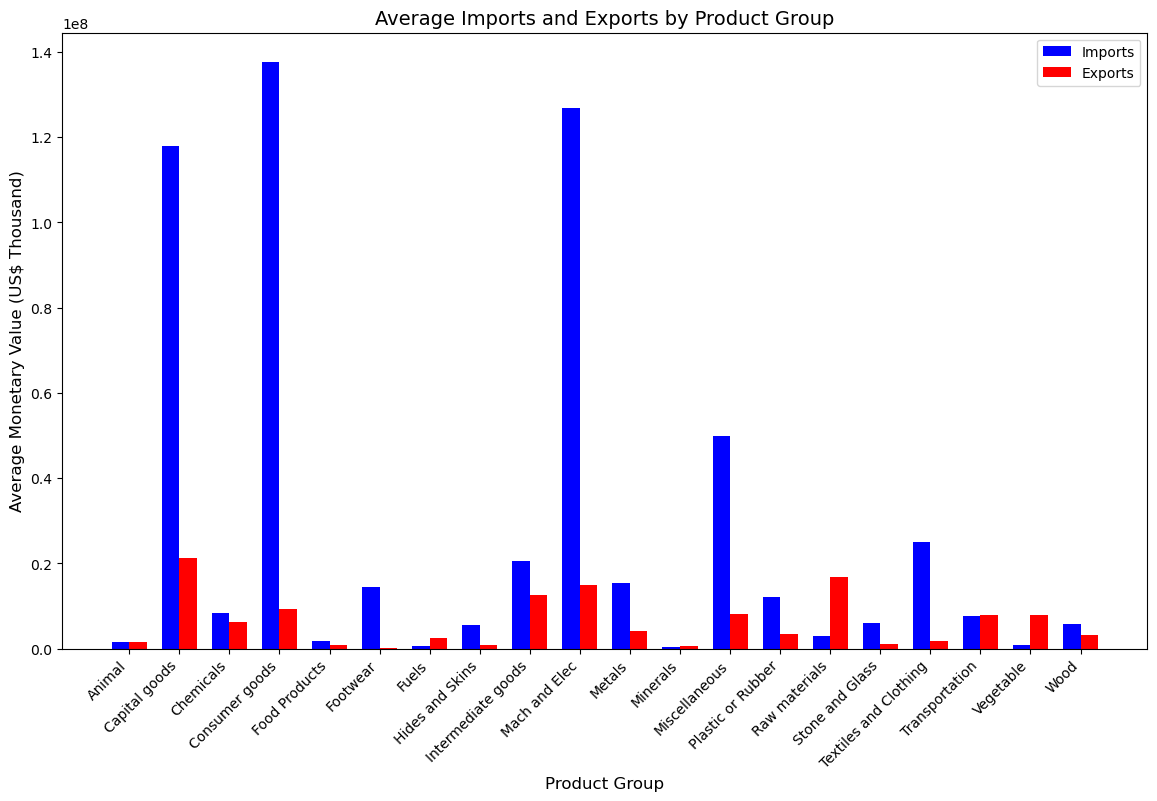

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Aggregate the data to calculate average imports and exports by product group, excluding "All Products"
aggregated_data = product_df[product_df['Product Group'] != 'All Products'].groupby('Product Group')[
    ['Import (US$ Thousand)', 'Export (US$ Thousand)']
].mean()

# Convert to numeric to ensure proper plotting
aggregated_data = aggregated_data.apply(pd.to_numeric, errors='coerce')

# Set up x-axis positions and bar width
x_positions = np.arange(len(aggregated_data))
bar_width = 0.35

# Create the bar graph
plt.figure(figsize=(14, 8))
plt.bar(x_positions - bar_width / 2, aggregated_data['Import (US$ Thousand)'], width=bar_width, label='Imports', color='blue')
plt.bar(x_positions + bar_width / 2, aggregated_data['Export (US$ Thousand)'], width=bar_width, label='Exports', color='red')

# Add labels, title, and legend
plt.xlabel("Product Group", fontsize=12)
plt.ylabel("Average Monetary Value (US$ Thousand)", fontsize=12)
plt.title("Average Imports and Exports by Product Group", fontsize=14)
plt.xticks(x_positions, aggregated_data.index, rotation=45, ha='right')
plt.legend()
plt.savefig("product_distribution_average.png", dpi = 300)
plt.show()

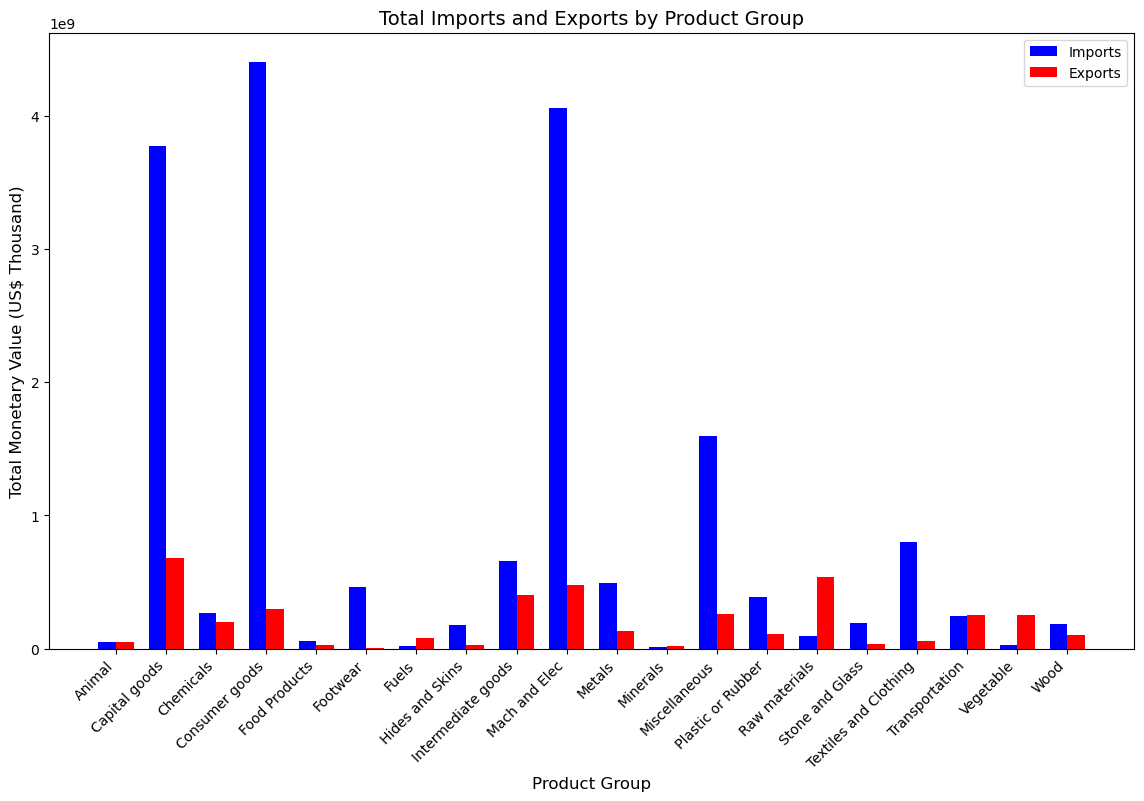

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Aggregate the data to calculate total imports and exports by product group, excluding "All Products"
aggregated_data = product_df[product_df['Product Group'] != 'All Products'].groupby('Product Group')[
    ['Import (US$ Thousand)', 'Export (US$ Thousand)']
].sum()

# Convert to numeric to ensure proper plotting
aggregated_data = aggregated_data.apply(pd.to_numeric, errors='coerce')

# Set up x-axis positions and bar width
x_positions = np.arange(len(aggregated_data))
bar_width = 0.35

# Create the bar graph
plt.figure(figsize=(14, 8))
plt.bar(x_positions - bar_width / 2, aggregated_data['Import (US$ Thousand)'], width=bar_width, label='Imports', color='blue')
plt.bar(x_positions + bar_width / 2, aggregated_data['Export (US$ Thousand)'], width=bar_width, label='Exports', color='red')

# Add labels, title, and legend
plt.xlabel("Product Group", fontsize=12)
plt.ylabel("Total Monetary Value (US$ Thousand)", fontsize=12)
plt.title("Total Imports and Exports by Product Group", fontsize=14)
plt.xticks(x_positions, aggregated_data.index, rotation=45, ha='right')
plt.legend()

# Display the plot
# plt.tight_layout()
plt.savefig("product_distribution_total.png", dpi = 300)
plt.show()

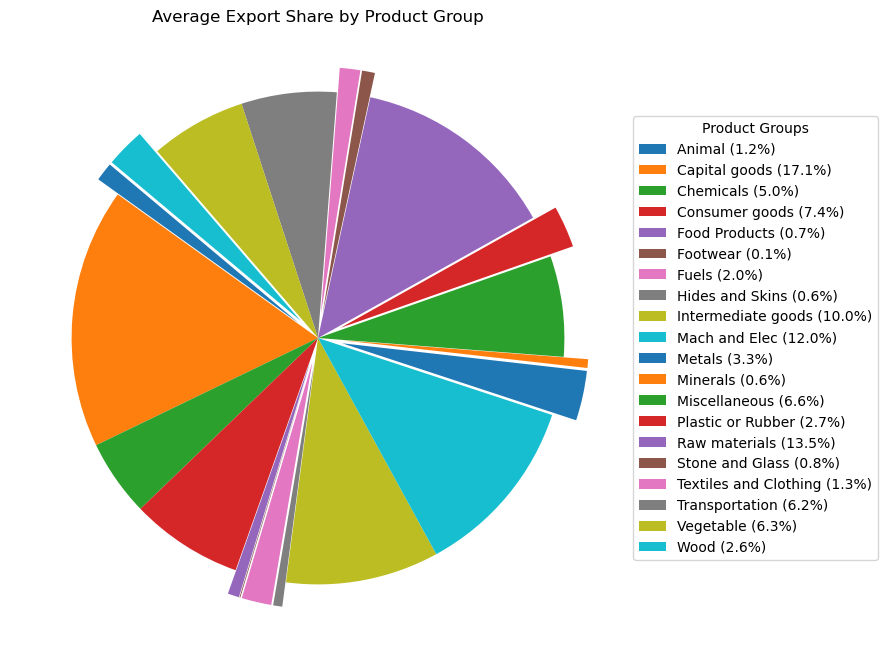

In [18]:
# Group by Product Group and calculate the average exports
average_exports = product_df[product_df['Product Group'] != 'All Products'].groupby('Product Group')['Export (US$ Thousand)'].mean()

# Convert the Export values to numeric
average_exports = pd.to_numeric(average_exports, errors='coerce')

# Calculate percentages for the legend
total_exports = average_exports.sum()
percentages = [(value / total_exports) * 100 for value in average_exports]

# Create labels with percentages for the legend
legend_labels = [f"{label} ({percentage:.1f}%)" for label, percentage in zip(average_exports.index, percentages)]

# Plot the pie chart
fig, ax = plt.subplots(figsize=(10, 8))
wedges, texts = ax.pie(
    average_exports,
    startangle=140,
    explode=[0.1 if value < average_exports.mean() else 0 for value in average_exports],  # Slightly explode smaller values
)

# Add the legend with percentages
ax.legend(
    wedges,
    legend_labels,
    title="Product Groups",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1),
)

# Add title and display
plt.title("Average Export Share by Product Group")
plt.savefig("products_share.png", dpi = 300)
plt.show()

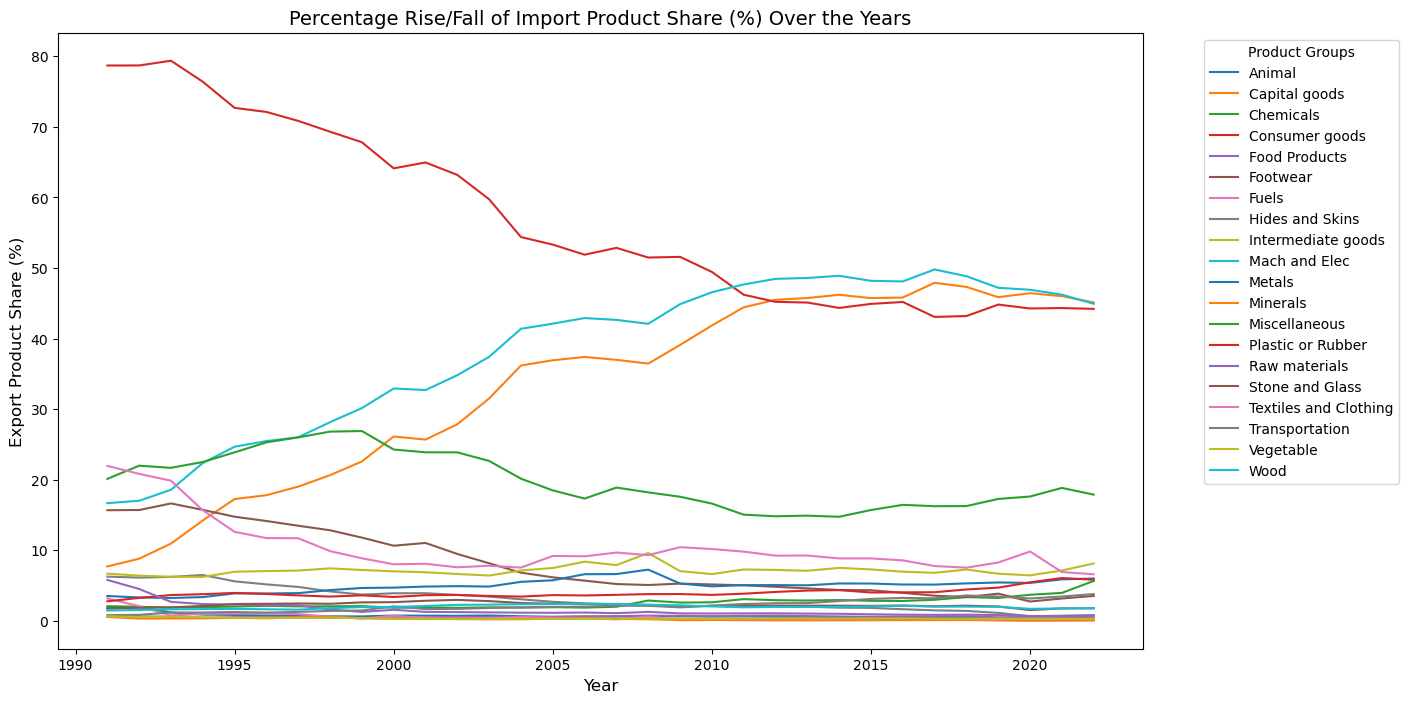

In [19]:
# Exclude "All Products" from the data
filtered_df = product_df[product_df['Product Group'] != 'All Products']

# Create a pivot table for visualization, with years as columns and Product Groups as rows
pivot_table = filtered_df.pivot_table(
    index='Year',
    columns='Product Group',
    values='Import Product Share (%)',
    aggfunc='mean'
)

# Plot the line chart
plt.figure(figsize=(14, 8))
for product_group in pivot_table.columns:
    plt.plot(pivot_table.index, pivot_table[product_group], label=product_group)

# Chart title and labels
plt.title("Percentage Rise/Fall of Import Product Share (%) Over the Years", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Export Product Share (%)", fontsize=12)
plt.legend(title="Product Groups", bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.tight_layout()
plt.savefig("product_import_percentage.png", dpi=300)
plt.show()

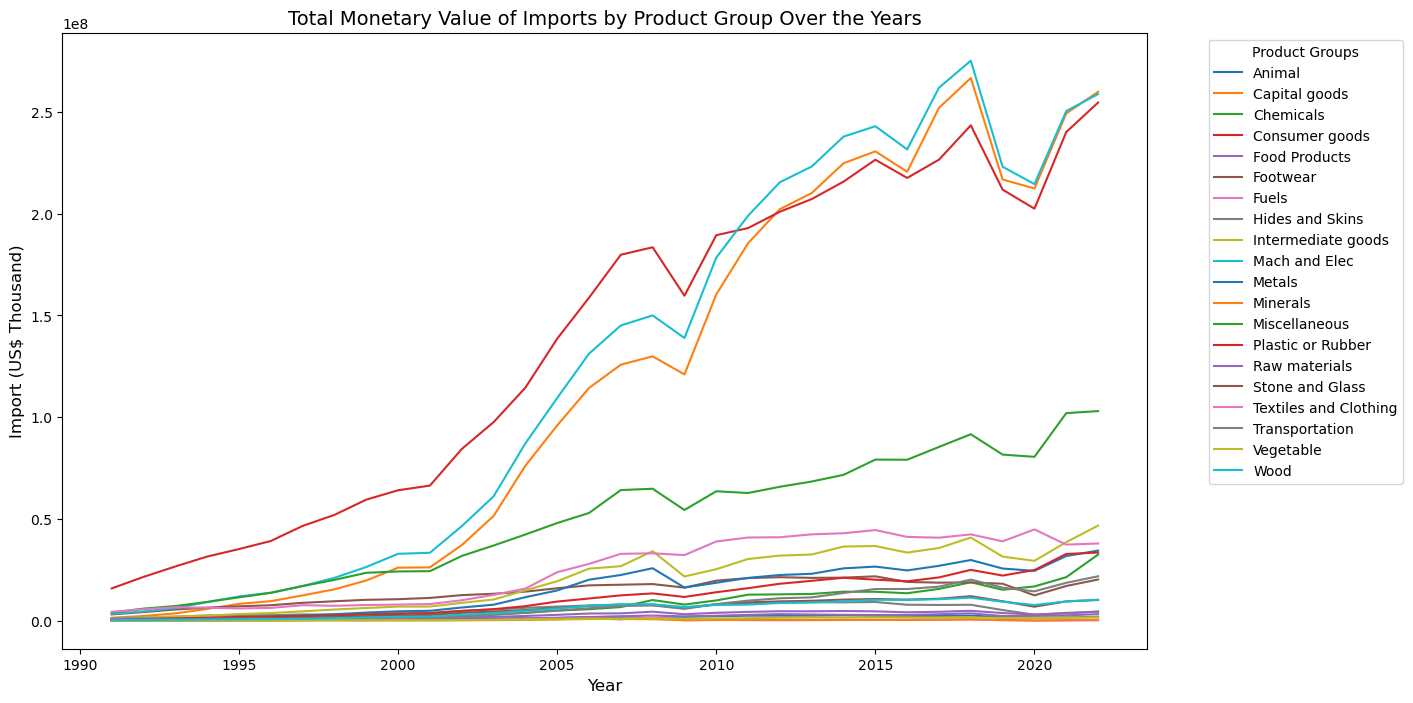

In [20]:
# Exclude "All Products" from the data
filtered_df = product_df[product_df['Product Group'] != 'All Products']

# Create a pivot table for visualization, with years as columns and Product Groups as rows
pivot_table_imports = filtered_df.pivot_table(
    index='Year',
    columns='Product Group',
    values='Import (US$ Thousand)',
    aggfunc='sum'
)

# Plot the line chart
plt.figure(figsize=(14, 8))
for product_group in pivot_table_imports.columns:
    plt.plot(pivot_table_imports.index, pivot_table_imports[product_group], label=product_group)

# Chart title and labels
plt.title("Total Monetary Value of Imports by Product Group Over the Years", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Import (US$ Thousand)", fontsize=12)
plt.legend(title="Product Groups", bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.tight_layout()
plt.savefig("product_import_value.png", dpi = 300)
plt.show()

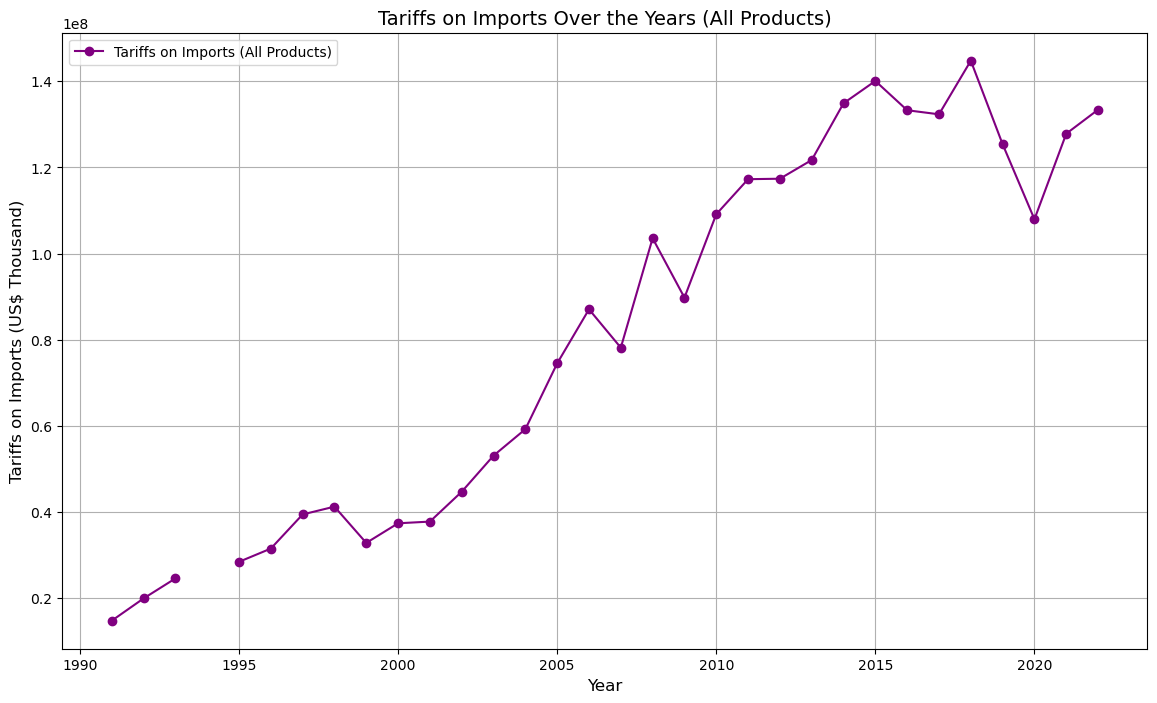

In [21]:
# Filter the data to include only "All Products"
all_products_tariffs_imports = product_df[product_df['Product Group'] == 'All Products'].groupby('Year')[
    'Tariffs on Imports (US$ Thousand)'
].mean()

# Plot the line chart
plt.figure(figsize=(14, 8))
plt.plot(all_products_tariffs_imports.index, all_products_tariffs_imports.values, marker='o', color='purple', label='Tariffs on Imports (All Products)')

# Add labels, title, and legend
plt.xlabel("Year", fontsize=12)
plt.ylabel("Tariffs on Imports (US$ Thousand)", fontsize=12)
plt.title("Tariffs on Imports Over the Years (All Products)", fontsize=14)
plt.legend()
plt.grid(True)

# Display the plot
# plt.tight_layout
plt.savefig("products_tariffs.png", dpi = 300)
plt.show()

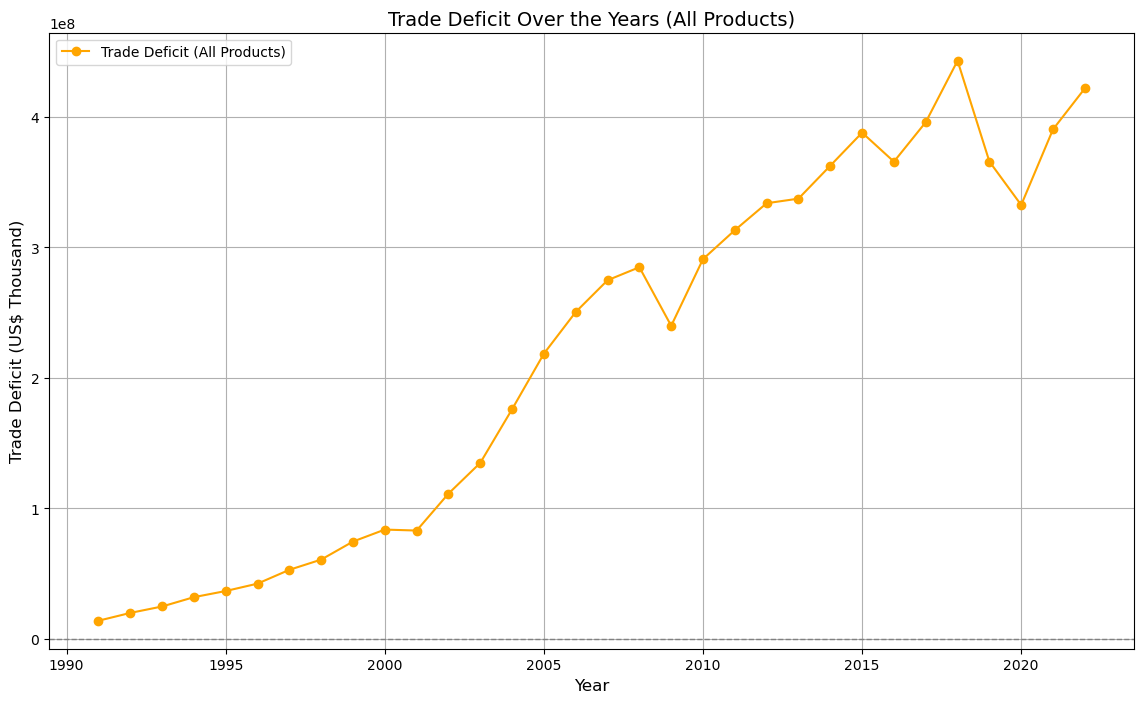

In [22]:
# Filter the data to include only "All Products"
all_products_trade_deficit = product_df[product_df['Product Group'] == 'All Products'].groupby('Year')[
    'Trade Deficit (US$ Thousand)'
].sum()

# Plot the line chart
plt.figure(figsize=(14, 8))
plt.plot(all_products_trade_deficit.index, all_products_trade_deficit.values, marker='o', color='orange', label='Trade Deficit (All Products)')

# Add labels, title, and legend
plt.xlabel("Year", fontsize=12)
plt.ylabel("Trade Deficit (US$ Thousand)", fontsize=12)
plt.title("Trade Deficit Over the Years (All Products)", fontsize=14)
plt.axhline(0, color='gray', linestyle='--', linewidth=1)  # Line for zero trade deficit
plt.legend()
plt.grid(True)

# Display the plot
# plt.tight_layout()
plt.savefig("product_trade_deficit.png", dpi = 300)
plt.show()

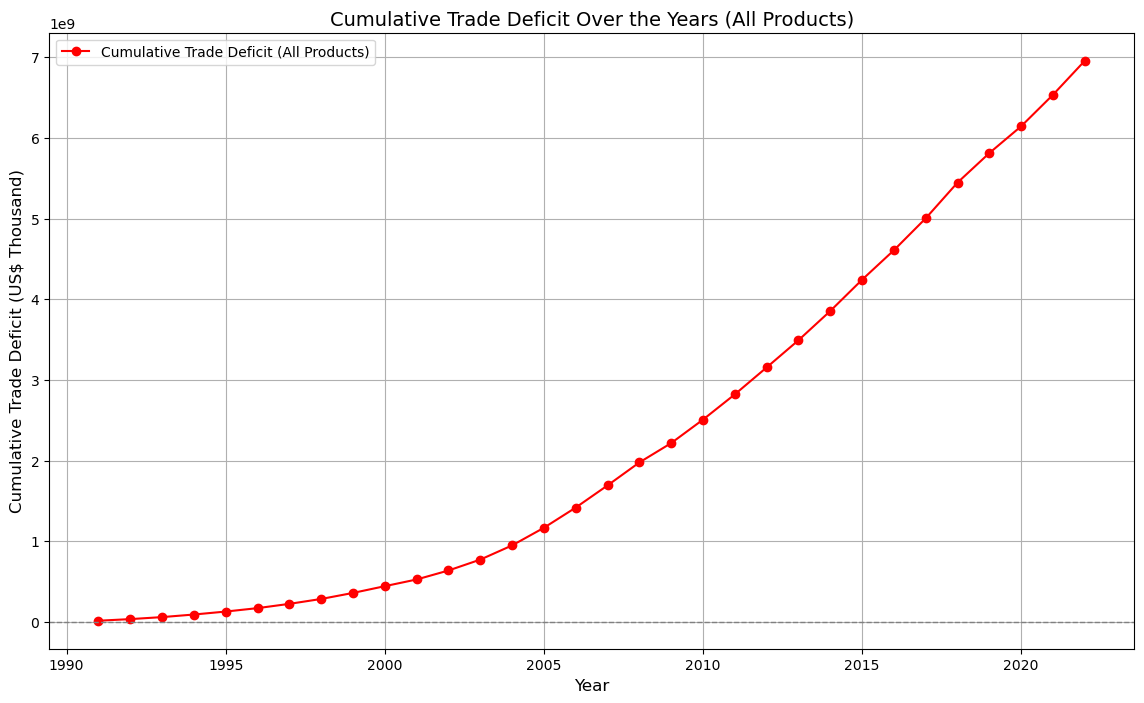

In [24]:
# Calculate cumulative trade deficit for "All Products"
all_products_cumulative_trade_deficit = product_df[product_df['Product Group'] == 'All Products'].groupby('Year')[
    'Trade Deficit (US$ Thousand)'
].sum().cumsum()

# Plot the cumulative trade deficit
plt.figure(figsize=(14, 8))
plt.plot(all_products_cumulative_trade_deficit.index, all_products_cumulative_trade_deficit.values, marker='o', color='red', label='Cumulative Trade Deficit (All Products)')

# Add labels, title, and legend
plt.xlabel("Year", fontsize=12)
plt.ylabel("Cumulative Trade Deficit (US$ Thousand)", fontsize=12)
plt.title("Cumulative Trade Deficit Over the Years (All Products)", fontsize=14)
plt.axhline(0, color='gray', linestyle='--', linewidth=1)  # Line for zero cumulative trade deficit
plt.legend()
plt.grid(True)
plt.savefig("product_trade_deficit_cumulative.png", dpi = 300)
plt.show()